#### Conductivity SP
 


### Se importan las librerias

In [1]:
# Se importan las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg
from statsmodels.graphics.factorplots import interaction_plot

### Se cargan los datos

In [2]:
datos = pd.read_csv("data/conductivity_SP_anova.csv", sep=";")

datos

,param,µS/cm
0,conductivity80,281
1,conductivity80,281
2,conductivity80,281
3,conductivity80,281
4,conductivity80,281
...,...,...
1231,conductivity1100,289
1232,conductivity1100,289
1233,conductivity1100,289
1234,conductivity1100,289


### Número de grupos, observaciones por grupo y distribución de las observaciones

In [3]:
# Número de observaciones por grupo
datos.groupby('param').size()

param
conductivity1100    618
conductivity80      618
dtype: int64

In [4]:
# Media y desviación típica por grupo
datos.groupby('param').agg(['mean','std'])

µS/cm          
                        mean       std
param                                 
conductivity1100  286.072816  2.221059
conductivity80    283.726537  2.616115

#### Análisis Gráfico

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 73.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 74.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='param', ylabel='µS/cm'>

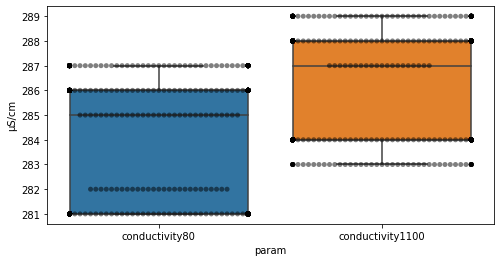

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
sns.boxplot(x="param", y="µS/cm", data=datos, ax=ax)
sns.swarmplot(x="param", y="µS/cm", data=datos, color='black', alpha = 0.5, ax=ax)

## Verificar condiciones para ANOVA

#### Distribución normal de las observaciones

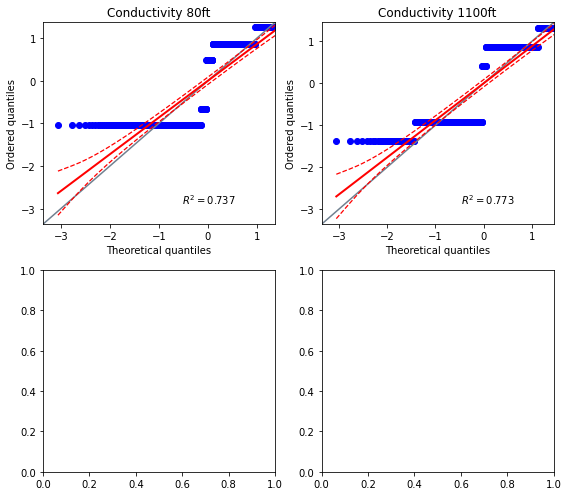

In [6]:
# Gráficos qqplot
fig, axs = plt.subplots(2, 2, figsize=(8, 7))
pg.qqplot(datos.loc[datos.param =='conductivity80', 'µS/cm'], dist='norm', ax=axs[0,0])
axs[0,0].set_title('Conductivity 80ft')
pg.qqplot(datos.loc[datos.param =='conductivity1100', 'µS/cm'], dist='norm', ax=axs[0,1])
axs[0,1].set_title('Conductivity 1100ft')
plt.tight_layout()

In [7]:
'''
# Test de normalidad Shapiro-Wilk
pg.normality(data=datos, dv='µS/cm', group='param')
'''

"\n# Test de normalidad Shapiro-Wilk\npg.normality(data=datos, dv='µS/cm', group='param')\n"

#### Varianza constante entre grupos (homocedasticidad)

In [8]:
'''
# Test de homocedasticidad
pg.homoscedasticity(data=datos, dv='µS/cm', group='param', method='levene')
'''

"\n# Test de homocedasticidad\npg.homoscedasticity(data=datos, dv='µS/cm', group='param', method='levene')\n"

#### Test ANOVA

In [9]:
# Se agrupan los datos
datos_agrupados = datos[['param','µS/cm']].groupby(['param'])
datos_agrupados.head(3)

,param,µS/cm
0,conductivity80,281
1,conductivity80,281
2,conductivity80,281
618,conductivity1100,284
619,conductivity1100,283
620,conductivity1100,283


In [11]:
# Test ANOVA de una vía (One-way ANOVA)
from scipy import stats

f_val, p_val = stats.f_oneway(datos_agrupados.get_group('conductivity80')['µS/cm'], 
                              datos_agrupados.get_group('conductivity1100')['µS/cm'])

print( "Resultados ANOVA: F=", f_val, ", P =", p_val) 

Resultados ANOVA: F= 288.8729868960353 , P = 2.2575931196409612e-58
